In [40]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [41]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


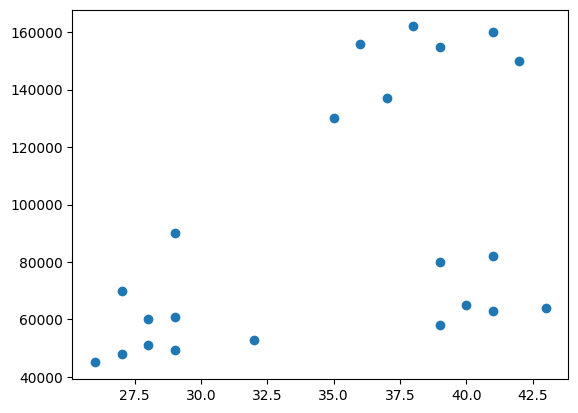

In [42]:
plt.scatter(df['Age'],df['Income($)'])
plt.xlabel = "Age"
plt.ylabel = "Income($)"

In [43]:
km = KMeans(n_clusters=3)

In [44]:
y_pred = km.fit_predict(df[['Age','Income($)']])
y_pred

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [45]:
df['Cluster'] = y_pred
df.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [46]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

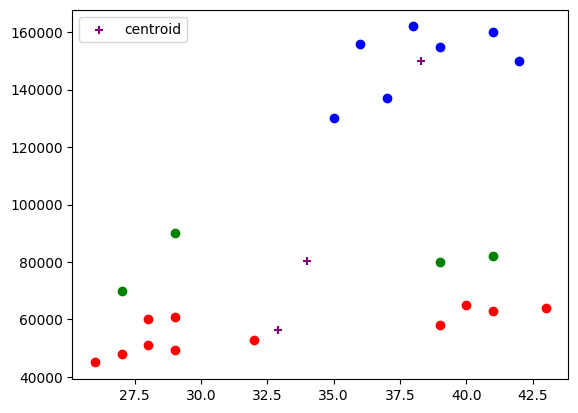

In [47]:
df0 = df[df.Cluster == 0]
df1 = df[df.Cluster == 1]
df2 = df[df.Cluster == 2]
plt.scatter(df0.Age, df0['Income($)'], color='red')
plt.scatter(df1.Age, df1['Income($)'], color='blue')
plt.scatter(df2.Age, df2['Income($)'], color='green')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='purple', marker='+', label='centroid')
plt.xlabel = "Age"
plt.ylabel = "Income($)"
plt.legend()

In [48]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [49]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['Age', 'Income($)']])
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [50]:
df['Cluster'] = y_pred
df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [51]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

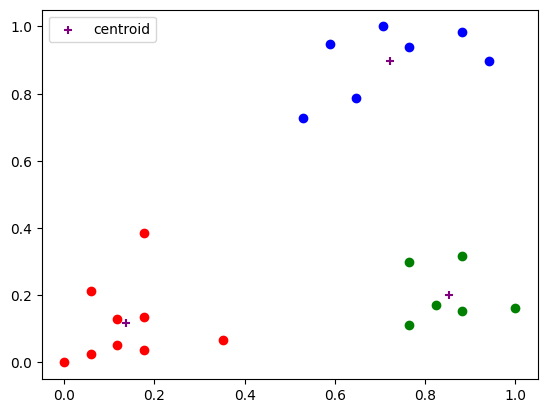

In [52]:
df0 = df[df.Cluster == 0]
df1 = df[df.Cluster == 1]
df2 = df[df.Cluster == 2]
plt.scatter(df0.Age, df0['Income($)'], color='red')
plt.scatter(df1.Age, df1['Income($)'], color='blue')
plt.scatter(df2.Age, df2['Income($)'], color='green')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='purple', marker='+', label='centroid')
plt.xlabel = "Age"
plt.ylabel = "Income($)"
plt.legend()

In [53]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

In [54]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.34910470944195654,
 0.28607171066894405,
 0.22020960864009398,
 0.1685851223602976,
 0.16526313275048976,
 0.11896101425276595]

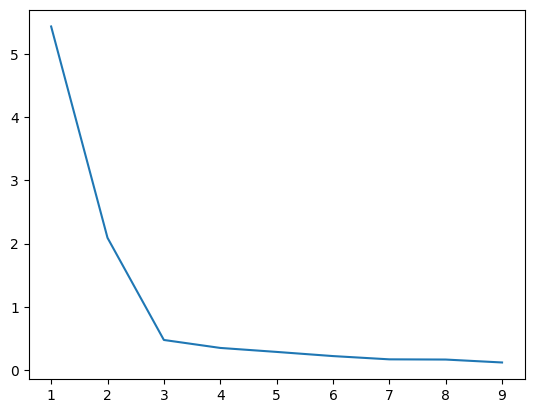

In [55]:
plt.xlabel = "K"
plt.ylabel = "Sum of Square Error"
plt.plot(k_rng,sse)